## Sales Trend 2016/2017

In [15]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
from itertools import groupby
from sklearn.linear_model import LinearRegression

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales1.csv")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame pre changing
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
#Changing format of sale date to datetime (from st

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
#print(sales_frame.dtypes)

### Sales Trend (Price)

    SALE YEAR  SALE MONTH  SALE PRICE AGGREGATED
0        2016           9           7.842562e+09
1        2016          10           6.184049e+09
2        2016          11           7.084841e+09
3        2016          12           1.052582e+10
4        2017           1           7.875755e+09
5        2017           2           5.490635e+09
6        2017           3           7.479973e+09
7        2017           4           6.004318e+09
8        2017           5           9.870463e+09
9        2017           6           8.385461e+09
10       2017           7           6.554480e+09
11       2017           8           6.037003e+09


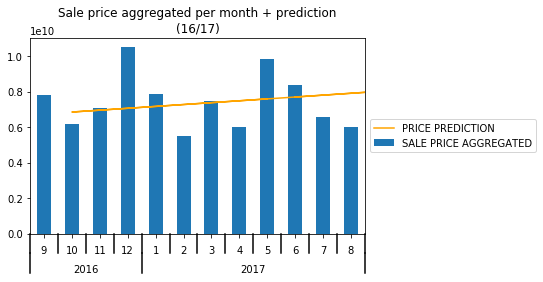

In [16]:
#Grouping SALE PRICE by SALE DATE (year --> month)
sales_frame_sale_date = sales_frame.groupby([sales_frame["SALE DATE"].dt.year.rename("SALE YEAR"), sales_frame["SALE DATE"].dt.month.rename("SALE MONTH")])
month_sale_price = sales_frame_sale_date["SALE PRICE"].sum().reset_index()
month_sale_price = month_sale_price.rename(columns={"SALE PRICE": "SALE PRICE AGGREGATED"})
#pd.options.display.float_format = '{:.2f}'.format
print(month_sale_price)

xs = month_sale_price["SALE MONTH"]
ys = month_sale_price["SALE PRICE AGGREGATED"]

model = LinearRegression()
xsl = []
for x in xs:
    xsl.append([x])
model.fit(xsl, ys)

predicted = model.predict(xsl)

def price_table():
    data_table = month_sale_price
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = price_table().groupby(["SALE YEAR", "SALE MONTH"]).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca())
plt.plot(xs, predicted, color="orange", label="PRICE PREDICTION")
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.title("Sale price aggregated per month + prediction\n(16/17)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig("data/Sales1617_prediction.jpg", bbox_inches="tight")
plt.show()

### Sales Trend (Amount)

    SALE YEAR  SALE MONTH  SALE COUNT
0        2016           9        6460
1        2016          10        5461
2        2016          11        5753
3        2016          12        6467
4        2017           1        5662
5        2017           2        5234
6        2017           3        6219
7        2017           4        5244
8        2017           5        6189
9        2017           6        7029
10       2017           7        5361
11       2017           8        4908


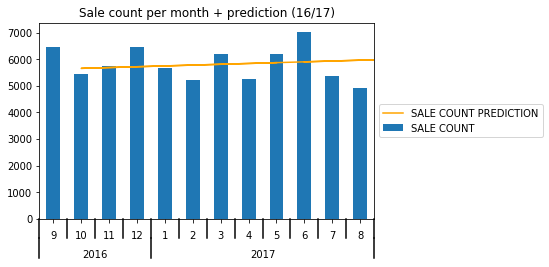

In [17]:
# Getting amount of sales per month using already grouped sales frame from above
month_sale_count = sales_frame_sale_date["SALE PRICE"].count().reset_index()
month_sale_count = month_sale_count.rename(columns={"SALE PRICE": "SALE COUNT"})
#pd.options.display.float_format = '{:.2f}'.format
print(month_sale_count)

xq = month_sale_count["SALE MONTH"]
yq = month_sale_count["SALE COUNT"]

model = LinearRegression()
xsq = []
for q in xq:
    xsq.append([q])
model.fit(xsq, yq)

predicted_count = model.predict(xsq)

def count_table():
    data_table = month_sale_count
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = count_table().groupby(["SALE YEAR", "SALE MONTH"]).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca())
plt.plot(xq, predicted_count, color="orange", label="SALE COUNT PREDICTION")
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.title("Sale count per month + prediction (16/17)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig("data/Sales_count1617_prediction.jpg", bbox_inches="tight")
plt.show()

